## **Immigration to Canada from 1980 to 2013**

## Exploratory Data Analysis

### Referenced notebooks authored by: Jimmy Oboni,

### **Setting Up** <a class="anchor" id="settingup"></a> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib as mpl
import seaborn as sns
sns.set(style='whitegrid')
print(plt.style.available)
mpl.style.use(['ggplot'])
import folium
from wordcloud import WordCloud, STOPWORDS

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Importing Dataset <a class="anchor" id="import"></a>

In [2]:
df_can = pd.read_csv('../input/immigration-to-canada/canadian_immegration_data.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


### Data Processing <a class="anchor" id="dataprocessing"></a>

In [3]:
# Set the 'Country' column as the index

df_can.set_index('Country', inplace=True)

# Converting the column names into strings

df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

# Review the changes made to our dataframe

print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


### Exploratory Data Analysis <a class="anchor" id="eda"></a>

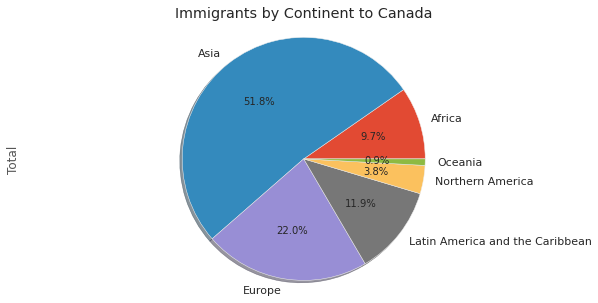

In [4]:
# Group countries by continents, apply sum() function, and see pie chart distribution

df_continent = df_can.groupby('Continent', axis = 0).sum()
df_continent['Total'].plot(kind = 'pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create %
plt.title('Immigrants by Continent to Canada')
plt.axis('equal')
plt.show()

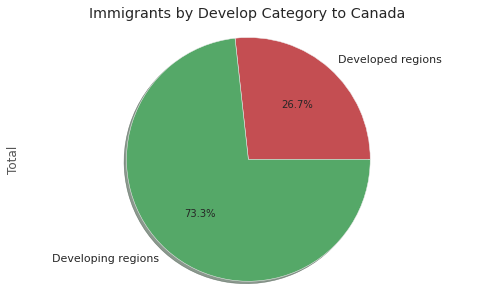

In [5]:
# Group by Develop Category, apply sum() function, and see pie chart distribution 

df_dev = df_can.groupby('DevName', axis = 0).sum()
df_dev['Total'].plot(kind = 'pie', figsize=(8,5), shadow=True, autopct='%1.1f%%', colors="rg")
plt.title('Immigrants by Develop Category to Canada')
plt.axis('equal')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'China'),
  Text(2, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(3, 0, 'Philippines'),
  Text(4, 0, 'Pakistan')])

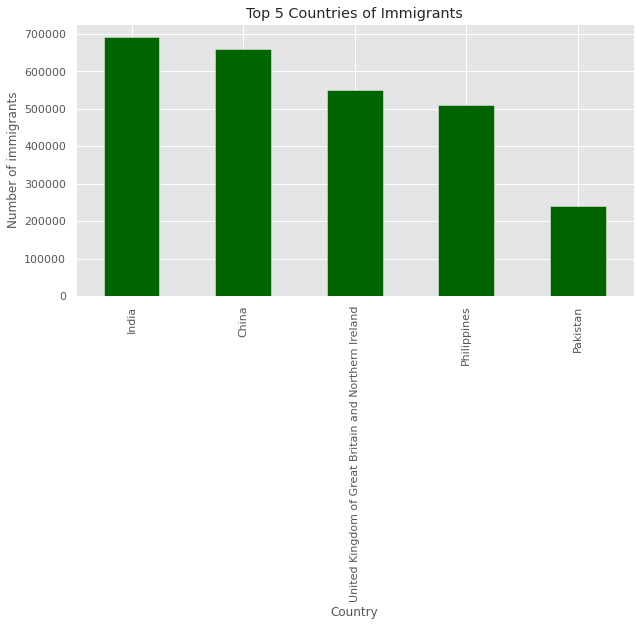

In [6]:
# Check distribution for Top 5 Countries of Immigrants to Canada

df_can_top5 = df_can.nlargest(n=5, columns='Total')
df_can_top5 = df_can_top5.groupby("Country", axis=0).sum()
df_can_top5.head()
df_can_top5['Total'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), rot=90, color='darkgreen')
plt.title('Top 5 Countries of Immigrants')
plt.ylabel('Number of immigrants')
plt.xticks(rotation=90)

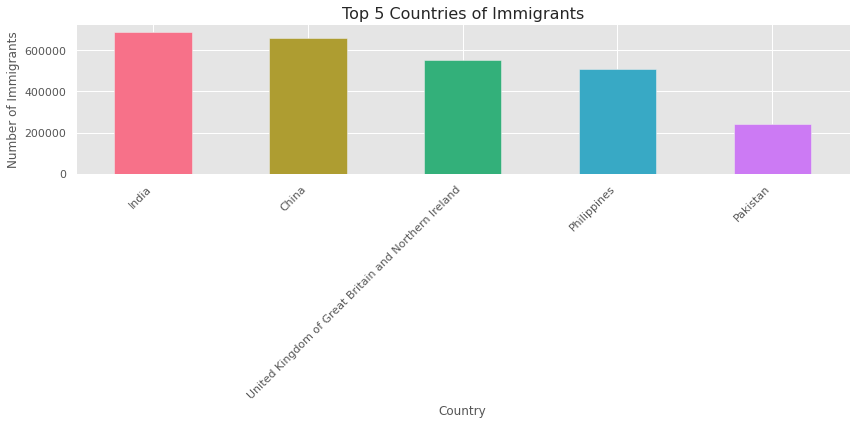

In [7]:
# Select the top 5 countries and sum the total immigrants
df_can_top5 = df_can.nlargest(n=5, columns='Total')
df_can_top5 = df_can_top5.groupby('Country').sum()

# Plotting the bar chart with prettier styles
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', len(df_can_top5))

# Plot the bar chart
ax = df_can_top5['Total'].sort_values(ascending=False).plot(kind='bar', color=colors)

# Adding title and labels
plt.title('Top 5 Countries of Immigrants', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Immigrants', fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

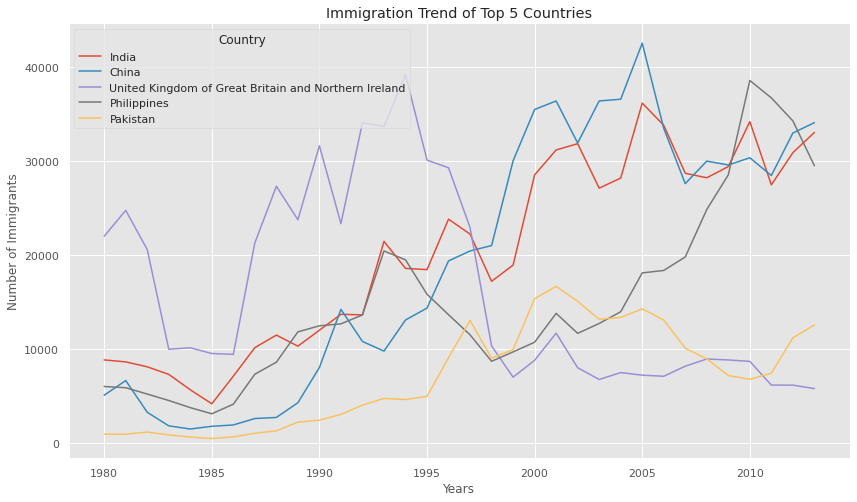

In [8]:
# Compare the trend of top 5 countries that contributed the most to immigration to Canada

inplace = True 
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose() 
print(df_top5)

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8)) 

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'New Caledonia'),
  Text(1, 0, 'San Marino'),
  Text(2, 0, 'Marshall Islands'),
  Text(3, 0, 'Western Sahara'),
  Text(4, 0, 'Palau')])

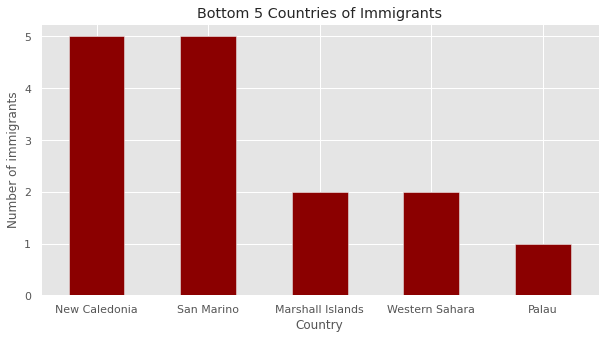

In [9]:
# distribution for Bottom 5 Countries of Immigrants to Canada

df_can_btm5 = df_can.nsmallest(n=5, columns='Total')
df_can_btm5 = df_can_btm5.groupby("Country", axis=0).sum()
df_can_btm5.head()
df_can_btm5['Total'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), rot=90, color='darkred')
plt.title('Bottom 5 Countries of Immigrants')
plt.ylabel('Number of immigrants')
plt.xticks(rotation=0)

**Comparing the trend of bottom 5 countries that contributed the least to immigration to Canada.**

Country  San Marino  New Caledonia  Marshall Islands  Western Sahara  Palau
1980              1              0                 0               0      0
1981              0              0                 0               0      0
1982              0              0                 0               0      0
1983              0              0                 0               0      0
1984              0              0                 0               0      0
1985              0              0                 0               0      0
1986              1              0                 0               0      0
1987              0              0                 0               0      0
1988              0              0                 0               0      0
1989              0              0                 0               0      0
1990              1              0                 0               0      0
1991              0              0                 0               1      0
1992        

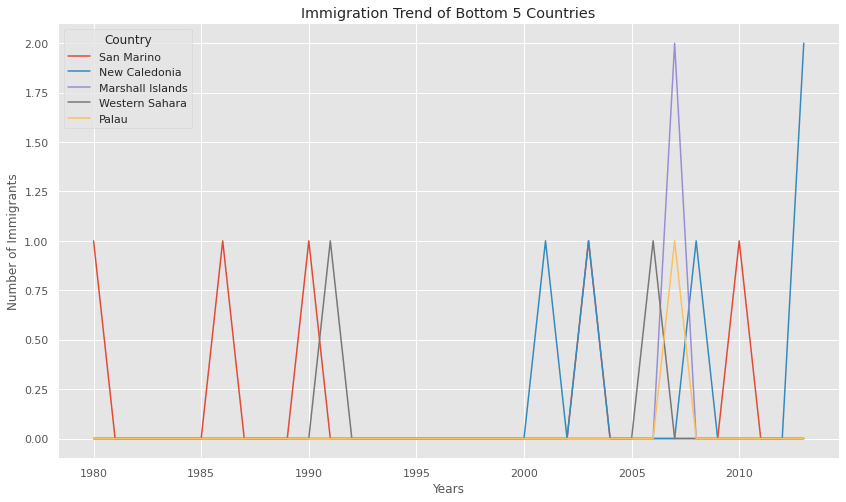

In [10]:
inplace = True 
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_bttm5 = df_can.tail(5)

df_bttm5 = df_bttm5[years].transpose() 
print(df_bttm5)

df_bttm5.index = df_bttm5.index.map(int)
df_bttm5.plot(kind='line', figsize=(14, 8)) 

plt.title('Immigration Trend of Bottom 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [11]:
# creating dataframe

df_can['Total'] = df_can.sum(axis=1)
df_can.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


Top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, let's visualize this plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot.

In [12]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_can.head() # get the top 5 entries

df_top5 = df_top5[years].transpose() # transpose the dataframe

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0.5, 0, 'Years')

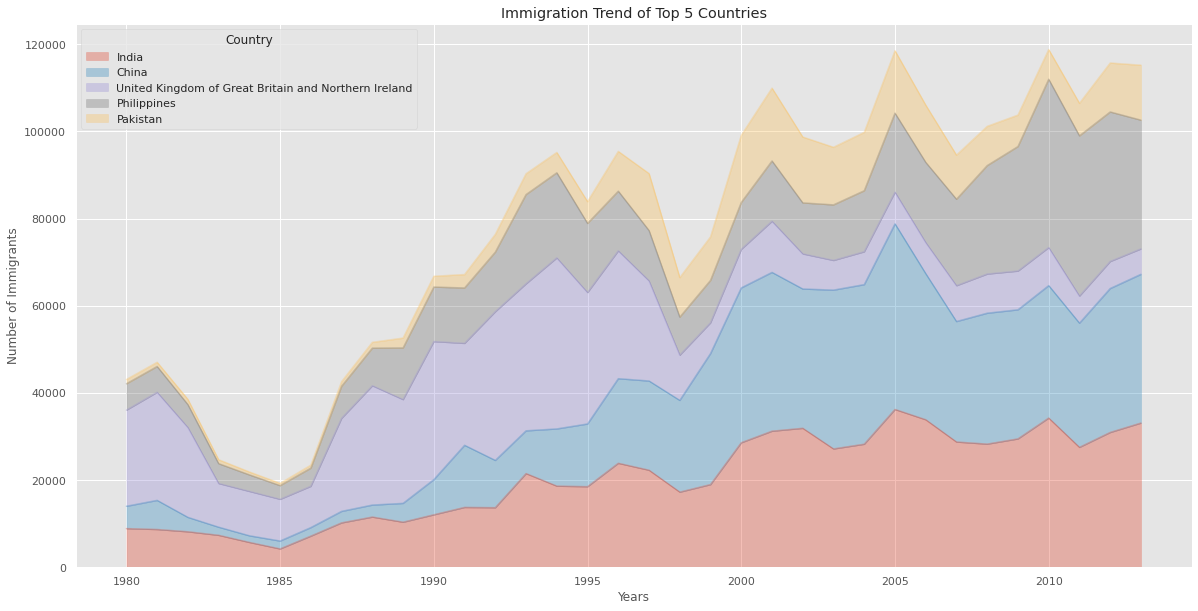

In [13]:
# plotting area plot

ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

We can also create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.

Text(0.5, 0, 'Years')

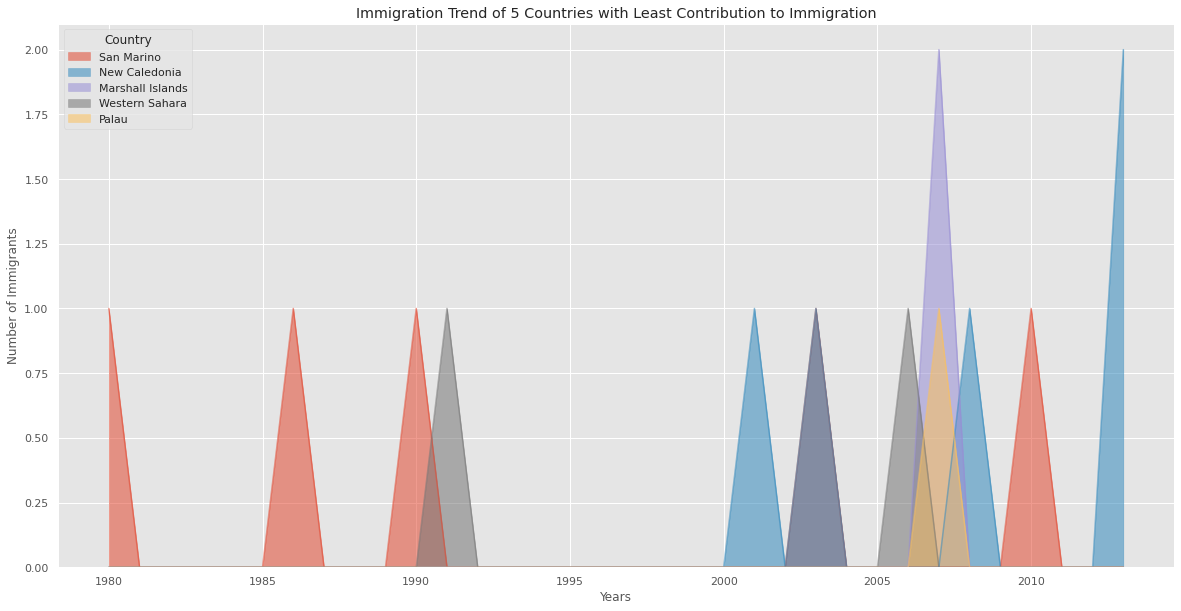

In [14]:
df_least5 = df_can.tail(5)

df_least5 = df_least5[years].transpose() 
df_least5.head()

df_least5.index = df_least5.index.map(int) 
    
ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Let's see the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013 alone:

In [15]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

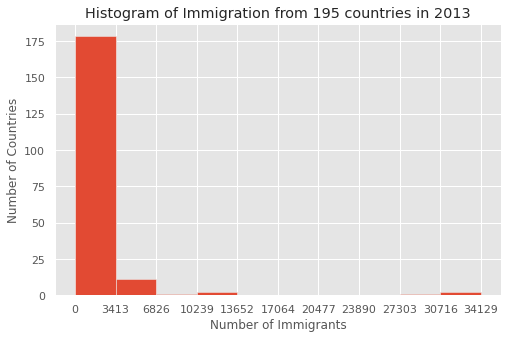

In [16]:
# plotting histogram for 2013 new immigrants to Canada

count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants')

plt.show()

Displaying the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. 

In [17]:
# creating top15 dtaframe

df_can.sort_values(by='Total', ascending=True, inplace=True)

df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  187170
Viet Nam                                                 194292
Jamaica                                                  212862
France                                                   218182
Lebanon                                                  230718
Poland                                                   278482
Republic of Korea                                        285162
Sri Lanka                                                296716
Iran (Islamic Republic of)                               351846
United States of America                                 482244
Pakistan                                                 483200
Philippines                                             1022782
United Kingdom of Great Britain and Northern Ireland    1103000
China                                                   1319924
India                                                   1383808
Name: Total, dtype: int64

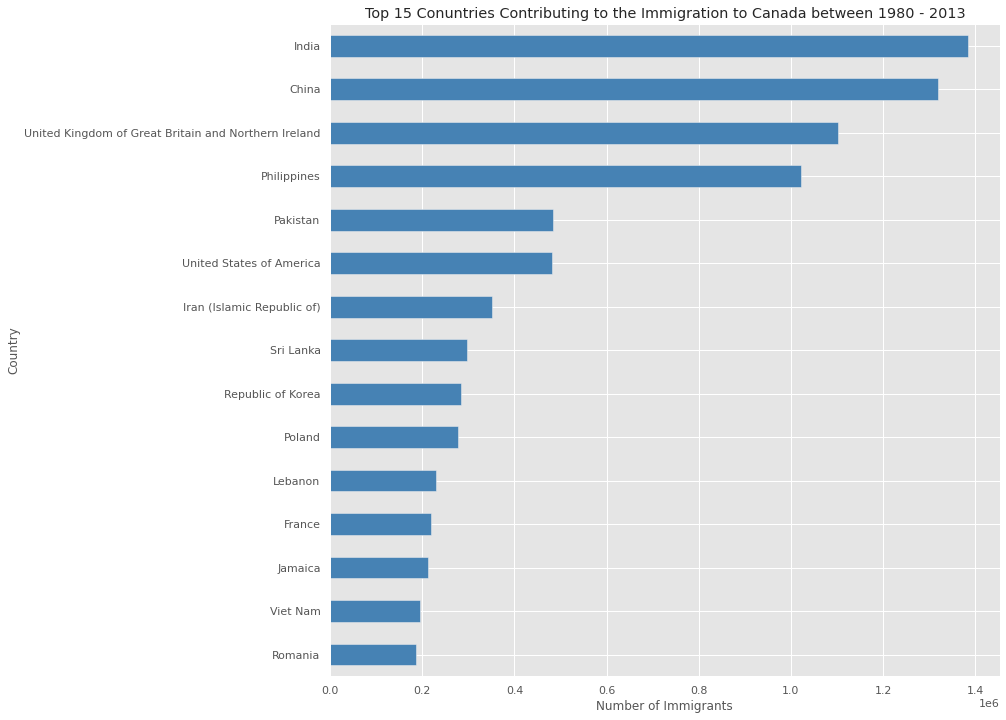

In [18]:
# plotting Bar Chart for Top 15 immigrant countries to Canada 1980 - 2013

df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

plt.show()

Let's create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [19]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,482244
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,351846
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,296716
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,285162


In [20]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [21]:
# quick statistical summary 

new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


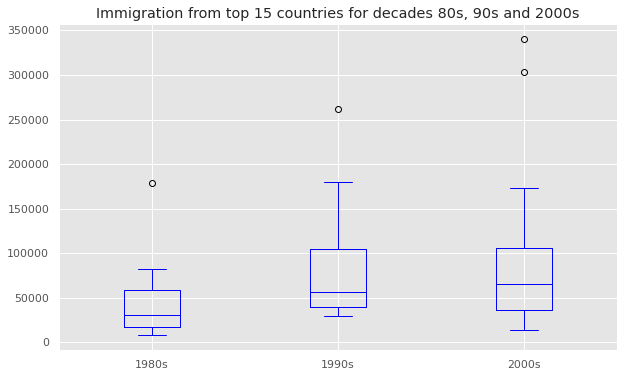

In [22]:
new_df.plot(kind='box', figsize=(10, 6), color = 'blue')
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [23]:
# let's check how many entries fall above the outlier threshold 

new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

 **Let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.**

In [24]:
# relationship betewen years and total population, we will convert years to int type.

df_tot = pd.DataFrame(df_can[years].sum(axis=0)) # use the sum() method to get the total population per year

df_tot.index = map(int, df_tot.index) # change the years to type int (useful for regression later on)

df_tot.reset_index(inplace = True) # reset the index to put in back in as a column in the df_tot dataframe

df_tot.columns = ['year', 'total'] # rename columns

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


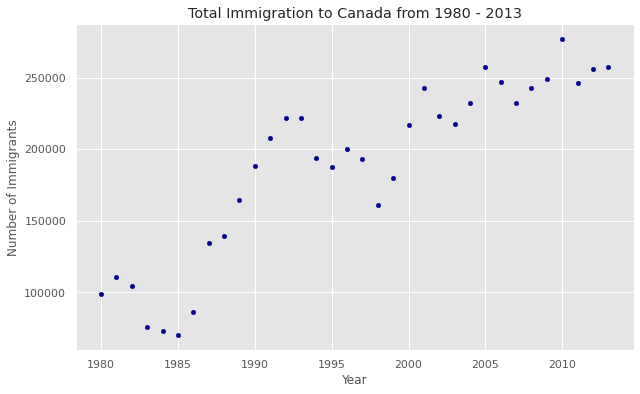

In [25]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Prediction <a class="anchor" id="predict"></a>

Notice how the scatter plot does not connect the data points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

In [26]:
x = df_tot['year']      
y = df_tot['total']    
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a * x + b, our output has 2 elements 5.56709228e+03, -1.09261952e+07 with the the slope in position 0 and intercept in position 1.

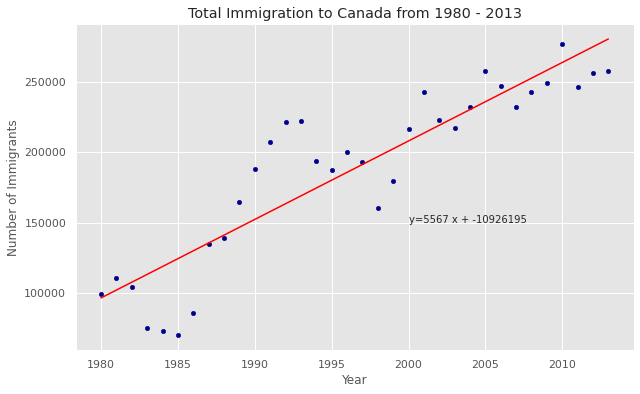

'No. Immigrants = 5567 * Year + -10926195'

In [27]:
# plot the regression line on the scatter plot

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

No. Immigrants = 5567 * Year - 10926195

No. Immigrants = 5567 * 2015 - 10926195

No. Immigrants = 291,310

When compared to the actual from Citizenship and Immigration Canada's (CIC) 2016 [Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that **Canada accepted 271,845 immigrants in 2015.** Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

<br>


**NB:** As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

### Case Studies <a class="anchor" id="cs"></a>

### Case Study 1: The Palace Coup <a class="anchor" id="cs1"></a>

In 1985, Major General Ibrahim Babangida, a former Head of State and the Army's Chief of Staff, successfully ousted Major General Muhammadu Buhari's administration on August 27, 1985, in a palace coup. Buhari was held for three years until 1988 after being arrested. In an effort to free his son from prison, former Head of State Buhari's mother passed away as a result of this anguish and sorrow.

Major General Muhammadu Buhari will later in 2015 and 2019 become a democratically elected President of Nigeria.


 We can quickly visualize a line graph of immigration from Nigeria:

In [28]:
nigeria = df_can.loc['Nigeria', years] # passing in years 1980 - 2013 to exclude the 'total' column
nigeria.head()

1980    81
1981    60
1982    58
1983    58
1984    78
Name: Nigeria, dtype: object

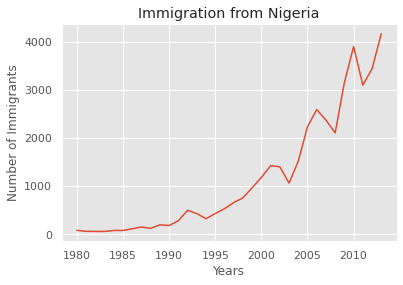

In [29]:
# plotting a line plot

nigeria.plot(kind='line')

plt.title('Immigration from Nigeria')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show() 

In [30]:
df_9ja = df_can.loc[['Nigeria'], years].transpose()
df_9ja.head()

Country,Nigeria
1980,81
1981,60
1982,58
1983,58
1984,78


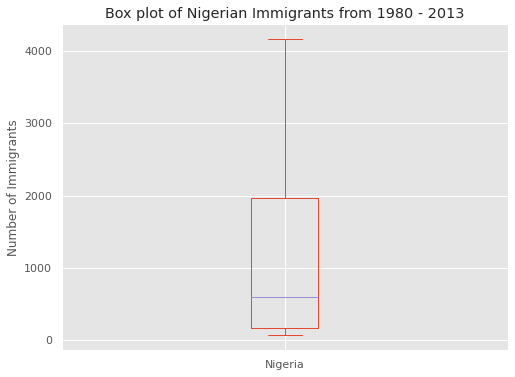

In [31]:
# creating box plot

df_9ja.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Nigerian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

The minimum number of immigrants is around 60 (min), maximum number is around 4180 (max), and median number of immigrants is around 600 (median).
25% of the years for period 1980 - 2013 had an annual immigrant count of ~150 or fewer (First quartile).
75% of the years for period 1980 - 2013 had an annual immigrant count of ~2000 or fewer (Third quartile).

In [32]:
# quick statistical summary 

df_9ja.describe()

Country,Nigeria
count,34.000000
mean,1168.588235
std,1249.203992
min,58.000000
25%,157.000000
50%,594.000000
75%,1961.250000
max,4172.000000


**Let's compare the number of immigrants from Nigeria and Ghana from 1980 to 2013.**

In [33]:
# creating dataframe for both countries

df_NG = df_can.loc[['Nigeria', 'Ghana'], years]
df_NG

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,81,60,58,58,78,78,114,149,122,195,...,1518,2236,2594,2375,2109,3156,3906,3103,3443,4172
Ghana,172,196,98,122,116,172,215,970,408,429,...,738,851,710,688,629,659,802,528,531,517


In [34]:
df_NG = df_NG.transpose()
df_NG.head()

Country,Nigeria,Ghana
1980,81,172
1981,60,196
1982,58,98
1983,58,122
1984,78,116


In [35]:
# viewing percentiles associated with both countries

df_NG.describe()

Country,Nigeria,Ghana
count,34.000000,34.000000
mean,1168.588235,765.647059
std,1249.203992,547.543544
min,58.000000,98.000000
25%,157.000000,434.000000
50%,594.000000,692.000000
75%,1961.250000,967.250000
max,4172.000000,2502.000000


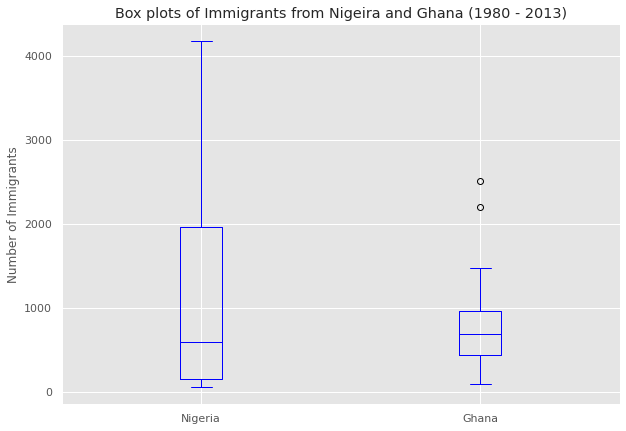

In [36]:
# plotting box plot for both countries

df_NG.plot(kind='box', figsize=(10, 7), color='blue')

plt.title('Box plots of Immigrants from Nigeira and Ghana (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

We can observe that, while both countries have around the same median immigrant population (~600), Nigeria's immigrant population range is a bit more spread out than Ghana's. The maximum population from Ghana for any year (2,502) is around 40% lower than the maximum population from Nigeria (4,172).

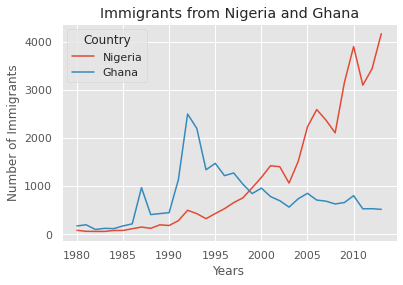

In [37]:
# line plot for both Countries

df_NG.index = df_NG.index.map(int)
df_NG.plot(kind='line')

plt.title('Immigrants from Nigeria and Ghana')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

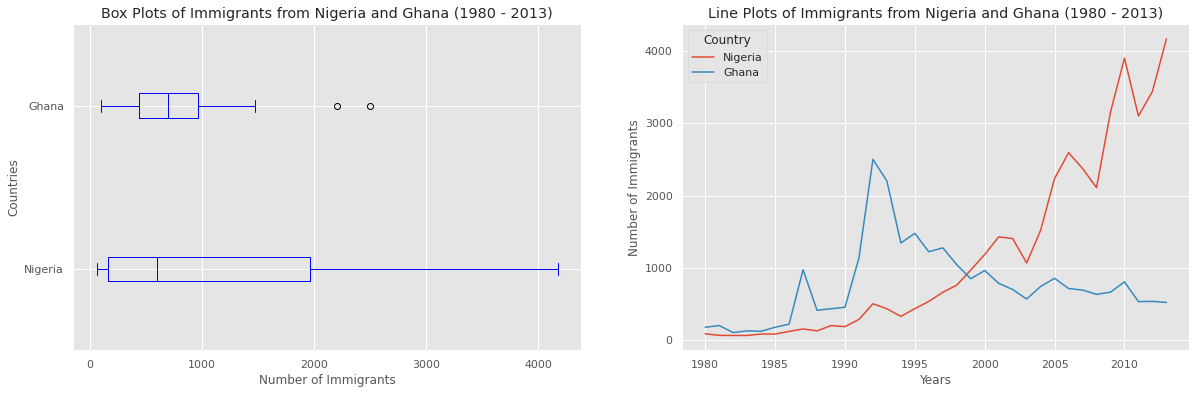

In [38]:
# let's perform a side by side comparison of the box plot with the line plot of Nigeria and Ghana's immigration.

fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
df_NG.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) 
ax0.set_title('Box Plots of Immigrants from Nigeria and Ghana (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_NG.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Immigrants from Nigeria and Ghana (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Let's see the immigration distribution for Nigeria, South Africa, and Egypt for years 1980 - 2013 to Canada?

In [39]:
# let's quickly view the dataset 

df_can.loc[['Nigeria', 'South Africa', 'Egypt'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,81,60,58,58,78,78,114,149,122,195,...,1518,2236,2594,2375,2109,3156,3906,3103,3443,4172
South Africa,1026,1118,781,379,271,310,718,1470,1305,1301,...,1175,988,1111,1200,1123,1188,1238,959,1243,1240
Egypt,612,660,755,455,447,348,514,1017,1085,1663,...,2393,2496,2190,2356,3347,3496,5982,4663,5555,4165


In [40]:
# transpose dataframe

df_t = df_can.loc[['Nigeria', 'South Africa', 'Egypt'], years].transpose()
df_t.head()

Country,Nigeria,South Africa,Egypt
1980,81,1026,612
1981,60,1118,660
1982,58,781,755
1983,58,379,455
1984,78,271,447


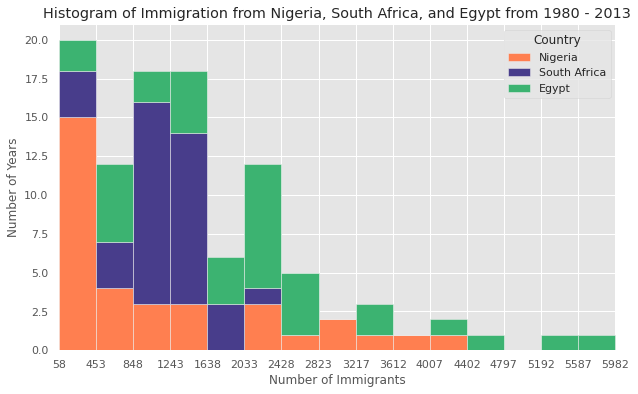

In [41]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Nigeria, South Africa, and Egypt from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()


displaying the immigration distribution for Ghana, Kenya, and Morocco for years 1980 - 2013 using an overlapping plot with 15 bins and a transparency value of 0.35.

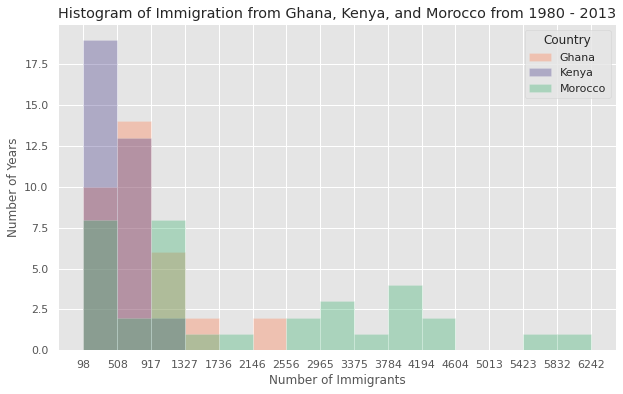

In [42]:
df_cof = df_can.loc[['Ghana', 'Kenya', 'Morocco'], years]

df_cof = df_cof.transpose() 
count, bin_edges = np.histogram(df_cof, 15)

df_cof.plot(kind ='hist',
figsize=(10, 6),
bins=15,
alpha=0.35,
xticks=bin_edges,
color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Ghana, Kenya, and Morocco from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

Create a scatter plot of the total immigration from Nigeria, South Africa, and Egypt to Canada from 1980 to 2013?

In [43]:
df_countries = df_can.loc[['Nigeria', 'South Africa', 'Egypt'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,1719
1,1981,1838
2,1982,1594
3,1983,892
4,1984,796


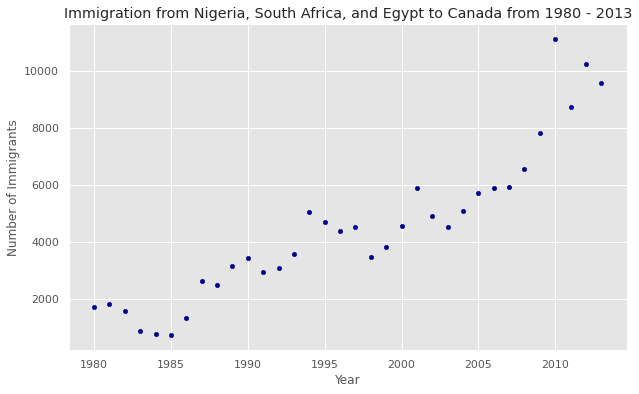

In [44]:
# generate the scatter plot by plotting the total versus year in df_total

df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Immigration from Nigeria, South Africa, and Egypt to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

### Case Study 2: Iceland's Financial Crisis <a class="anchor" id="cs2"></a>

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

In [45]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

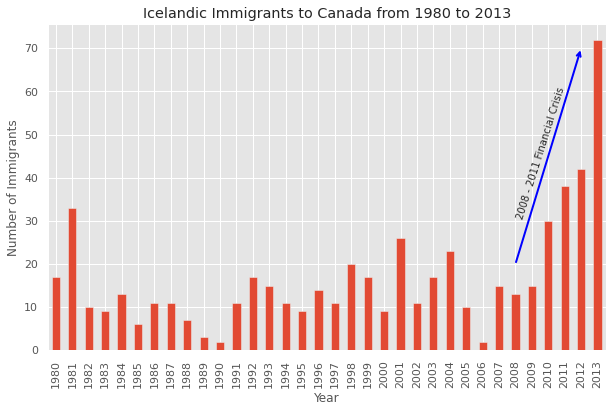

In [46]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

### Case Study 3: Argentina's Great Depression <a class="anchor" id="cs3"></a>

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

In [47]:

df_can_t = df_can[years].transpose() # transposed dataframe

df_can_t.index = map(int, df_can_t.index) # cast the Years (the index) to type int

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True) # reset index to bring the Year in as a column

df_can_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [48]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

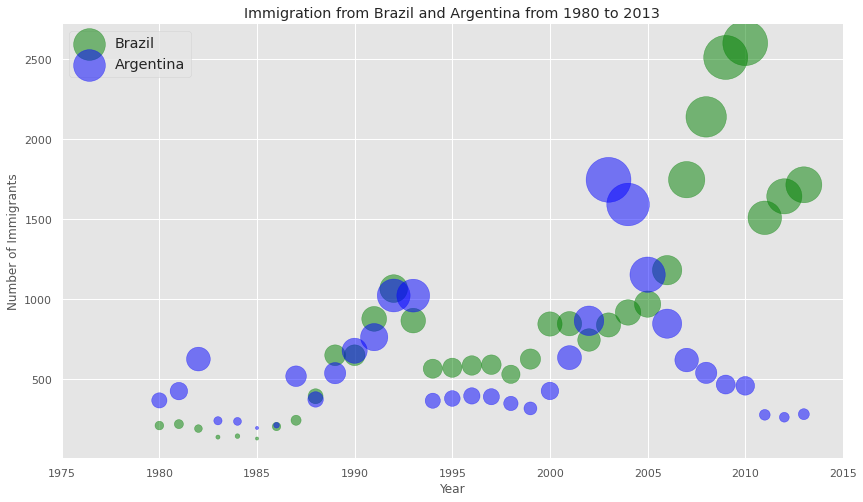

In [49]:
# plot the data

# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

In [50]:
# normalizing Nigeria and Ghana data

norm_nigeria = (df_can_t['Nigeria'] - df_can_t['Nigeria'].min()) / (df_can_t['Nigeria'].max() - df_can_t['Nigeria'].min())
    
norm_ghana = (df_can_t['Ghana'] - df_can_t['Ghana'].min()) / (df_can_t['Ghana'].max() - df_can_t['Ghana'].min())

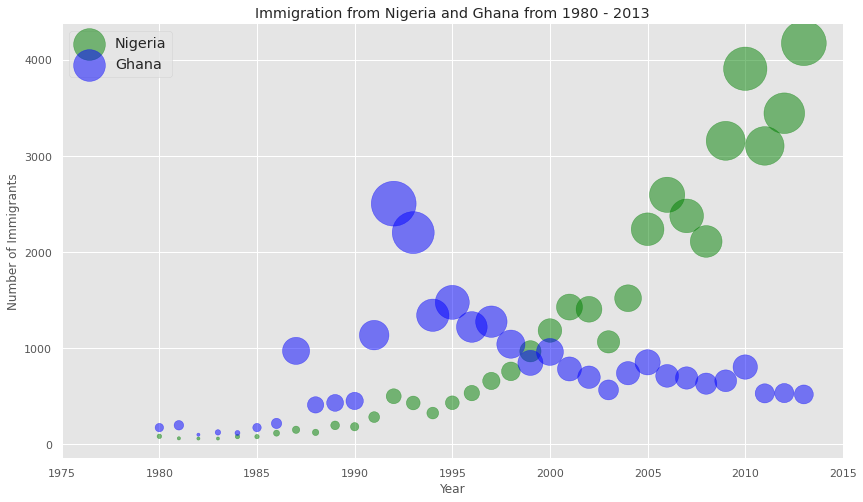

In [51]:
ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='Nigeria',
                        figsize=(14, 8),
                        alpha=0.5,                  
                        color='green',
                        s=norm_nigeria * 2000 + 10,  
                        xlim=(1975, 2015)
                       )

ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='Ghana',
                        alpha=0.5,
                        color="blue",
                        s=norm_ghana * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Nigeria and Ghana from 1980 - 2013')
ax0.legend(['Nigeria', 'Ghana'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Nigeria from the 1985 Palace Coup. 

On a similar note, Ghana's immigration started dipping from the year 2000 when John Kufuor became president of Ghana after defeating John Atta Mills.



### Extra Visualization <a class="anchor" id="extra"></a>

In [52]:
# let's create a new dataframe for these three countries 
df_nse = df_can.loc[['Nigeria', 'South Africa', 'Egypt'], :]

# let's take a look at our dataframe
df_nse

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,Africa,Western Africa,Developing regions,81,60,58,58,78,78,114,...,2236,2594,2375,2109,3156,3906,3103,3443,4172,79464
South Africa,Africa,Southern Africa,Developing regions,1026,1118,781,379,271,310,718,...,988,1111,1200,1123,1188,1238,959,1243,1240,81136
Egypt,Africa,Northern Africa,Developing regions,612,660,755,455,447,348,514,...,2496,2190,2356,3347,3496,5982,4663,5555,4165,145490


### Waffle Chart <a class="anchor" id="wafflechart"></a>

Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

In [53]:
# compute the proportion of each category with respect to the total

total_values = df_nse['Total'].sum()
category_proportions = df_nse['Total'] / total_values

pd.DataFrame({"Category Proportion": category_proportions}) # print out proportions

,Category Proportion
Country,
Nigeria,0.259610
South Africa,0.265072
Egypt,0.475318


In [54]:
# defining the overall size of the waffle chart.

width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [55]:
# compute the number of tiles for each category

tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

pd.DataFrame({"Number of tiles": tiles_per_category}) # print out number of tiles per category

,Number of tiles
Country,
Nigeria,104
South Africa,106
Egypt,190


Based on the calculated proportions, Nigeria will occupy 104 tiles of the waffle chart, South Africa will occupy 106 tiles, and Egypt will occupy 190 tiles.

In [56]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [57]:
# Let's take a peek at how the matrix looks like

waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 

<Figure size 432x288 with 0 Axes>

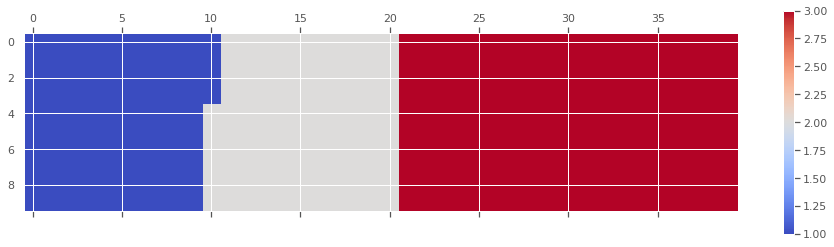

In [58]:
# Map the waffle chart matrix into a visual.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

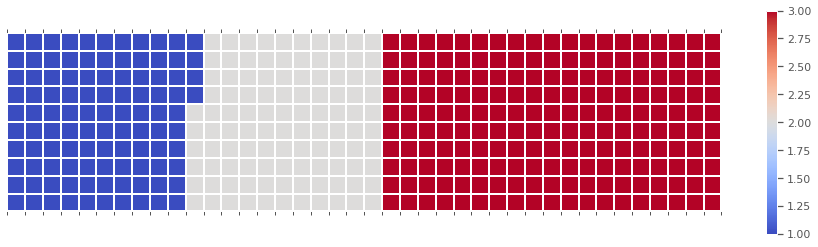

In [59]:
# let's prettify the chart.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

### Word Cloud <a class="anchor" id="wc"></a>

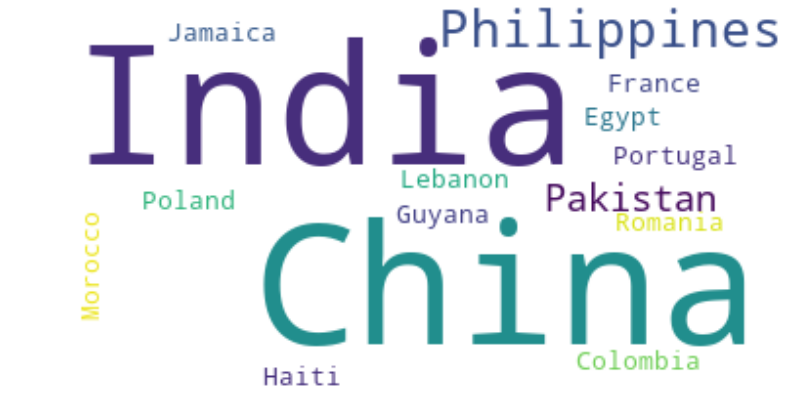

In [60]:
stopwords = set(STOPWORDS)

total_immigration = df_can['Total'].sum()
total_immigration

max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!

### Maps <a class="anchor" id="map"></a>

In [61]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [62]:
#define Nigeria's geolocation coordinates
nigeria_latitude = 9.0820
nigeria_longitude = 8.6753

# define the world map centered around Canada with a higher zoom level
nigeria_map = folium.Map(location=[nigeria_latitude, nigeria_longitude], zoom_start=4)

# display world map
nigeria_map

In [63]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

Stamen Toner are perfect for data mashups and exploring river meanders and coastal zones.

In [64]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

Stamen Terrain are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.

In [65]:
# Creating a map of Nigeria to visualize its hill shading and natural vegetation.

#define Nigeria's geolocation coordinates
nigeria_latitude = 9.0820
nigeria_longitude = 8.6753

# define the world map centered around Canada with a higher zoom level
nigeria_map = folium.Map(location=[nigeria_latitude, nigeria_longitude], zoom_start=6, tiles='Stamen Terrain')

# display world map
nigeria_map

**Note: Remember that correlation between some data does not necessarily indicate causality, therefore we need to back up these findings with other evidence.**